In [10]:
from ChargeAPI.API_infrastructure.charge_request import module_version
from rdkit.Chem import rdmolfiles
from rdkit.Chem import AllChem
import rdkit
from rdkit import Chem
import json
from rdkit.Chem import Draw, rdMolAlign


In [11]:
supplier = Chem.SDMolSupplier("./optimised_molecules.sdf",removeHs=False)


In [12]:
images = []
for i, mol in enumerate(supplier):
    mol_block = rdmolfiles.MolToMolBlock(mol)
    charge_result = module_version.handle_charge_request(conformer_mol=mol_block,
                                                         charge_model='MBIS_WB_GAS_CHARGE_DIPOLE')
    AllChem.Compute2DCoords(mol)

    charges = json.loads(charge_result['charge_result'])
    for i, atom in enumerate(mol.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(mol)
img = Draw.MolsToGridImage(images, subImgSize=(400, 400), returnPNG=False)


ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode


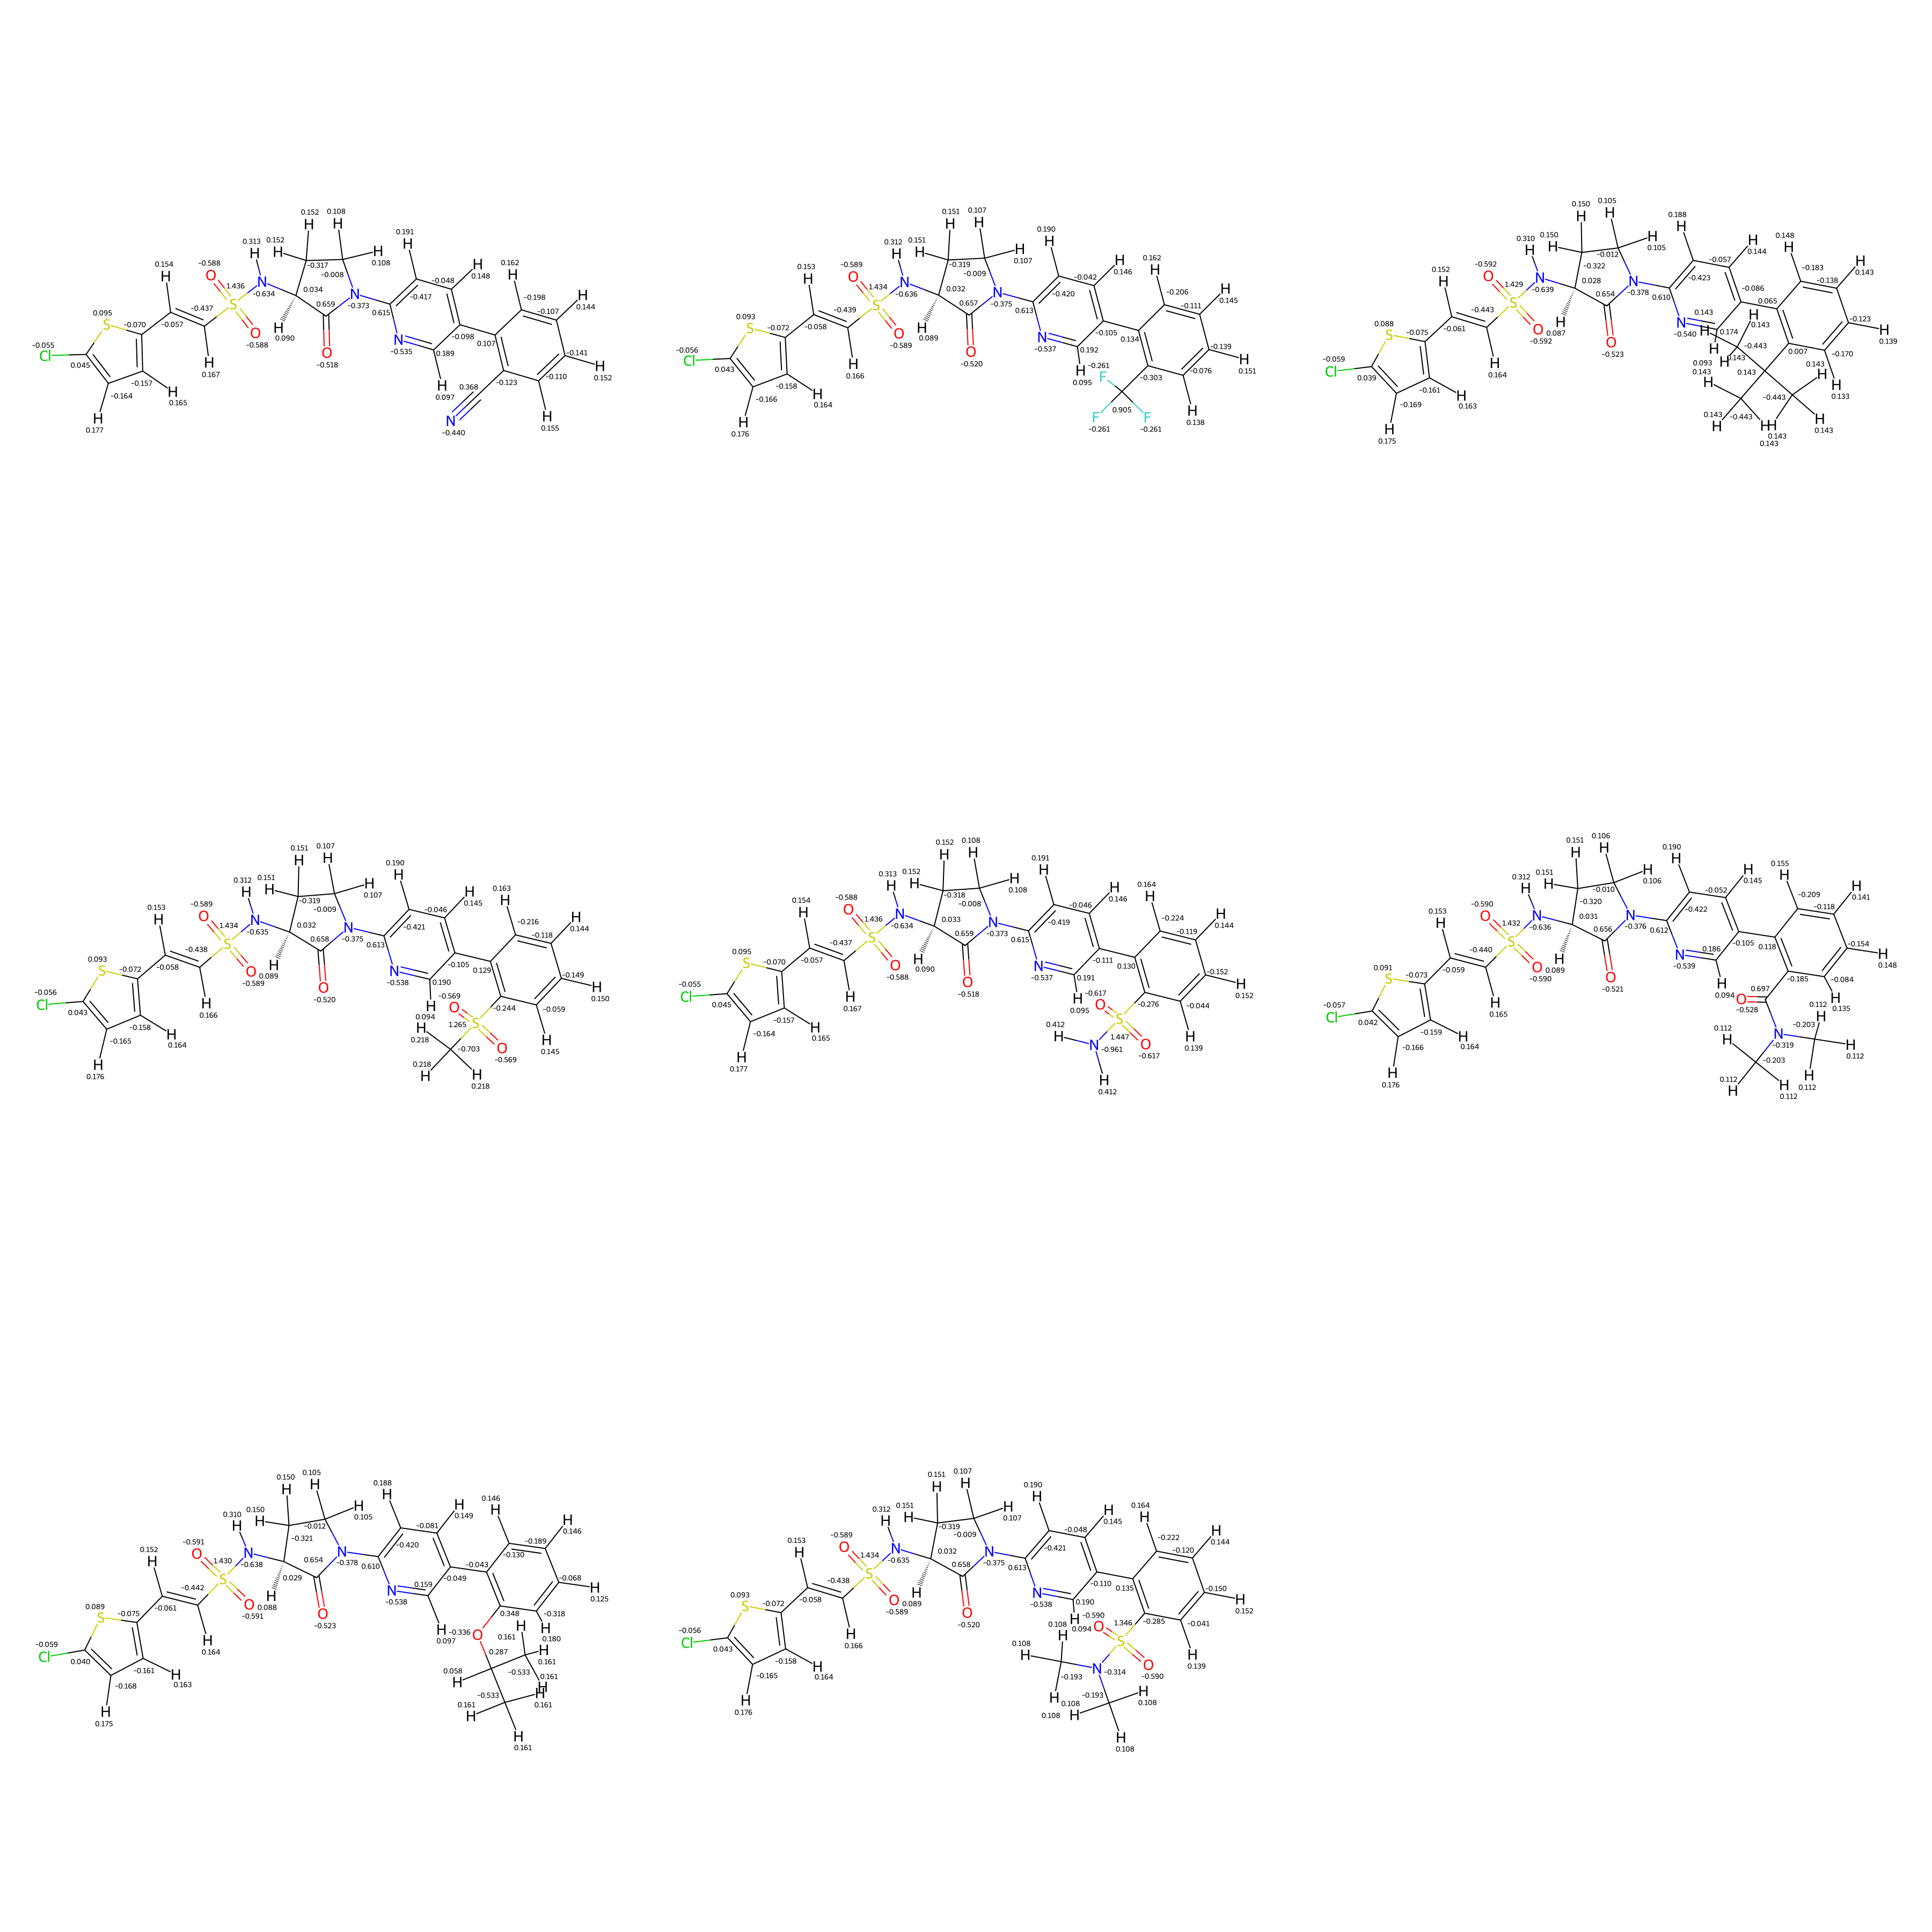

In [28]:
img = Draw.MolsToGridImage(images, subImgSize=(1200, 1200), returnPNG=True)
img


In [30]:
png = img.data
with open('./fXa_labelled.png','wb+') as outf:
    outf.write(png)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


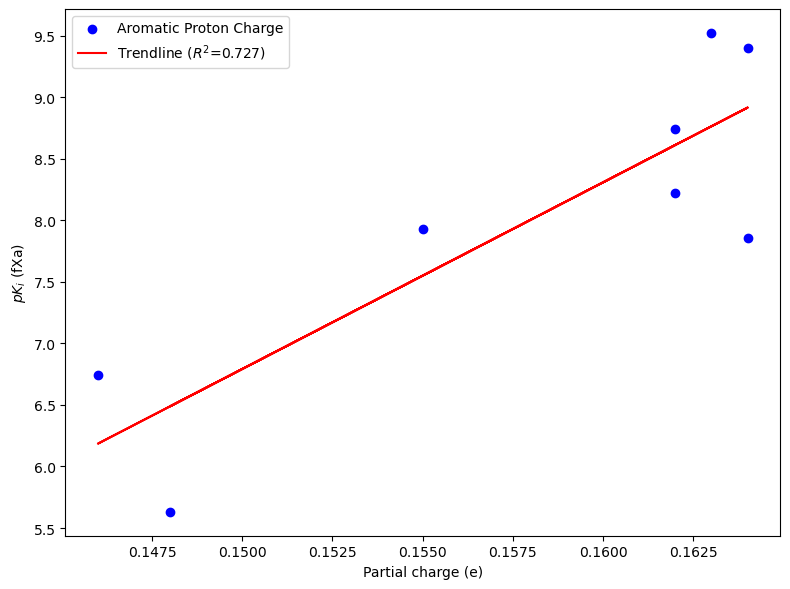

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Read data
data = pd.read_csv("MedChem Results - fxa.csv") 

# Extract x and y
x = data['h-charge']
y = data['pfxa']

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line = slope * x + intercept

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Aromatic Proton Charge')

# Plot trendline with equation and R² in legend
label = f'Trendline ($R^2$={r_value**2:.3f})'
plt.plot(x, line, color='red', label=label)

# Labels
plt.xlabel('Partial charge (e)')
plt.ylabel('$pK_i$ (fXa)')
plt.legend()
plt.tight_layout()
plt.savefig('fXa charge plot.png', dpi=300)

plt.show()
